In [2]:
import pandas as pd
print(pd.__version__)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from mlxtend.frequent_patterns import apriori, association_rules
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

2.1.4


In [45]:
df=pd.read_csv("/Users/sabbirahamedsaown/Desktop/DMA/hounslow_data.csv")

In [61]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,Speed_limit_category
0,200501ID60078,507460,174070,-0.454758,51.455367,3,1,1,30/09/2005,6,...,0,0,0,1,1,1,0,0,1,low
1,200501SX20837,519340,178590,-0.282325,51.493614,3,2,1,13/10/2005,5,...,0,0,0,1,2,2,0,0,1,medium
2,200501TB00052,511670,176330,-0.393476,51.474866,3,1,4,30/01/2005,1,...,3006,0,0,1,1,2,0,0,1,medium
3,200501TB00234,510550,179040,-0.408749,51.499444,3,3,1,08/07/2005,6,...,0,0,0,1,1,1,0,0,1,medium
4,200501TB00288,518290,178120,-0.297600,51.489610,3,2,1,19/08/2005,6,...,0,0,0,4,1,1,0,0,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,201001XD80325,512040,178570,-0.387441,51.494927,3,2,1,23/04/2010,6,...,0,0,5,1,1,1,0,0,1,low
4590,201001XD80356,517730,178670,-0.305479,51.494670,3,1,1,14/05/2010,6,...,0,0,0,4,1,1,0,0,1,low
4591,201001XD80660,510540,179010,-0.408902,51.499176,3,2,1,02/09/2010,5,...,0,0,0,1,1,1,0,0,2,medium
4592,201001XH30096,510530,178950,-0.409065,51.498639,3,2,1,06/02/2010,7,...,0,0,0,1,1,1,0,0,2,low


In [6]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_District,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.0,4594.000000,4594.000000,4594.000000,4594.000000,4594.0,...,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.0,4594.000000
mean,514209.736613,176237.851545,-0.356941,51.473519,1.0,2.856334,1.904658,1.255768,4.092294,25.0,...,179.745320,0.003700,0.970396,1.884414,1.302133,1.237701,0.053548,0.031563,1.0,1.200479
std,3691.800542,1988.109806,0.053537,0.017416,0.0,0.380559,0.631946,0.616288,1.889782,0.0,...,626.217575,0.076582,1.933804,1.384309,1.108391,0.509101,0.487784,0.415889,0.0,0.412191
min,507180.000000,171100.000000,-0.458762,51.427842,1.0,1.000000,1.000000,1.000000,1.000000,25.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
25%,511020.000000,175060.000000,-0.403416,51.463265,1.0,3.000000,2.000000,1.000000,3.000000,25.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
50%,513110.000000,176610.000000,-0.372692,51.477346,1.0,3.000000,2.000000,1.000000,4.000000,25.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
75%,517197.500000,177940.000000,-0.313453,51.488212,1.0,3.000000,2.000000,1.000000,6.000000,25.0,...,4.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
max,521890.000000,179500.000000,-0.245604,51.501776,1.0,3.000000,6.000000,7.000000,7.000000,25.0,...,3377.000000,2.000000,8.000000,7.000000,9.000000,5.000000,6.000000,7.000000,1.0,3.000000


In [47]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [48]:
na_mask = df.isna()

# Create a mask for -1 values
minus_one_mask = (df == -1)

# Combine the masks to identify all missing values
combined_mask = na_mask | minus_one_mask

# Count the number of rows with at least one missing value or -1
rows_with_missing_values = combined_mask.any(axis=1).sum()

print(f"Number of rows with at least one missing value or -1: {rows_with_missing_values}")

Number of rows with at least one missing value or -1: 1369


In [49]:
df['Accident_Severity'] = df['Accident_Severity'].astype('category')
df['Road_Type'] = df['Road_Type'].astype('category')
df['Weather_Conditions'] = df['Weather_Conditions'].astype('category')
df['Light_Conditions'] = df['Light_Conditions'].astype('category')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category')
df['Junction_Detail'] = df['Junction_Detail'].astype('category')
df['Junction_Control'] = df['Junction_Control'].astype('category')

In [50]:
changed_dtypes = ['Accident_Severity', 'Road_Type', 'Junction_Detail','Junction_Control','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']

# To show the datatypes of specific columns
print(df[changed_dtypes].dtypes)

Accident_Severity          category
Road_Type                  category
Junction_Detail            category
Junction_Control           category
Light_Conditions           category
Weather_Conditions         category
Road_Surface_Conditions    category
dtype: object


In [51]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_District,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.0,4594.000000,4594.000000,4594.000000,4594.0,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.0,4594.000000
mean,514209.736613,176237.851545,-0.356941,51.473519,1.0,1.904658,1.255768,4.092294,25.0,3.532869,473.660644,32.459730,3.095342,179.745320,0.003700,0.970396,0.053548,0.031563,1.0,1.200479
std,3691.800542,1988.109806,0.053537,0.017416,0.0,0.631946,0.616288,1.889782,0.0,1.252521,923.631078,6.294968,2.909635,626.217575,0.076582,1.933804,0.487784,0.415889,0.0,0.412191
min,507180.000000,171100.000000,-0.458762,51.427842,1.0,1.000000,1.000000,1.000000,25.0,1.000000,0.000000,20.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,511020.000000,175060.000000,-0.403416,51.463265,1.0,2.000000,1.000000,3.000000,25.0,3.000000,4.000000,30.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,513110.000000,176610.000000,-0.372692,51.477346,1.0,2.000000,1.000000,4.000000,25.0,3.000000,244.000000,30.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
75%,517197.500000,177940.000000,-0.313453,51.488212,1.0,2.000000,1.000000,6.000000,25.0,4.000000,315.000000,30.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
max,521890.000000,179500.000000,-0.245604,51.501776,1.0,6.000000,7.000000,7.000000,25.0,6.000000,3377.000000,70.000000,6.000000,3377.000000,2.000000,8.000000,6.000000,7.000000,1.0,3.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Accident_Index                               4594 non-null   object  
 1   Location_Easting_OSGR                        4594 non-null   int64   
 2   Location_Northing_OSGR                       4594 non-null   int64   
 3   Longitude                                    4594 non-null   float64 
 4   Latitude                                     4594 non-null   float64 
 5   Police_Force                                 4594 non-null   int64   
 6   Accident_Severity                            4594 non-null   category
 7   Number_of_Vehicles                           4594 non-null   int64   
 8   Number_of_Casualties                         4594 non-null   int64   
 9   Date                                         4594 non-null   ob

In [7]:
# To count missing values across the entire DataFrame
total_missing = df.isna().sum().sum()  # Count of NaN across the whole DataFrame
total_minus_ones = (df == -1).sum().sum()  # Count of -1 across the whole DataFrame
total_missing_or_minus_one = total_missing + total_minus_ones
print (total_missing_or_minus_one)

2737


In [52]:
na_mask = df.isna()

# Create a mask for -1 values
minus_one_mask = (df == -1)

# Combine the masks to identify all missing values
combined_mask = na_mask | minus_one_mask

# Count the number of rows with at least one missing value or -1
rows_with_missing_values = combined_mask.any(axis=1).sum()

print(f"Number of rows with at least one missing value or -1: {rows_with_missing_values}")

Number of rows with at least one missing value or -1: 1369


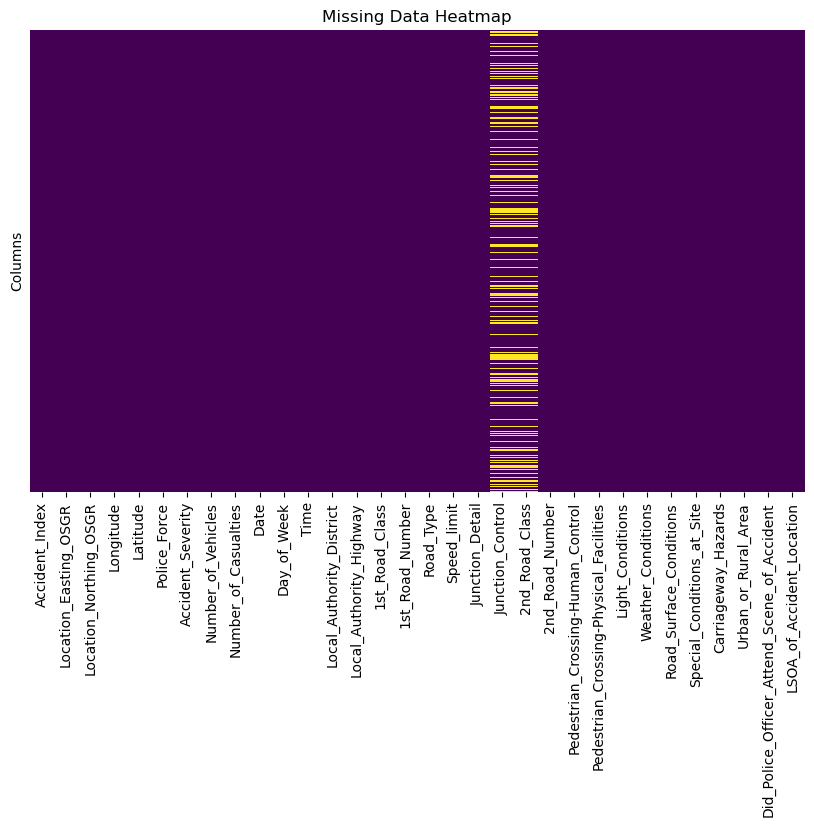

In [8]:
# Create a mask that indicates where data is missing
missing_mask = df.isna() | (df == -1)

plt.figure(figsize=(10, 6))
sns.heatmap(missing_mask, cbar=False, yticklabels=False, cmap='viridis')
plt.ylabel('Columns')
plt.title('Missing Data Heatmap')
plt.show()

In [53]:
# Initialize an empty list to hold the names of columns with constant values
constant_columns = []

# Check each column for constant values
for column in df.columns:
    if df[column].nunique() == 1:
        constant_columns.append(column)

df = df.drop(columns=constant_columns)

# Output the names of columns with constant values
print("Columns with constant values:", constant_columns)

Columns with constant values: ['Police_Force', 'Local_Authority_District', 'Local_Authority_Highway', 'Urban_or_Rural_Area']


In [54]:
df.dtypes


Accident_Index                                   object
Location_Easting_OSGR                             int64
Location_Northing_OSGR                            int64
Longitude                                       float64
Latitude                                        float64
Accident_Severity                              category
Number_of_Vehicles                                int64
Number_of_Casualties                              int64
Date                                             object
Day_of_Week                                       int64
Time                                             object
1st_Road_Class                                    int64
1st_Road_Number                                   int64
Road_Type                                      category
Speed_limit                                       int64
Junction_Detail                                category
Junction_Control                               category
2nd_Road_Class                                  

In [55]:
changed_dtypes = df[['Accident_Severity','Road_Type', 'Junction_Detail', 'Junction_Control','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Longitude','Latitude']].dtypes
print(changed_dtypes)



Accident_Severity          category
Road_Type                  category
Junction_Detail            category
Junction_Control           category
Light_Conditions           category
Weather_Conditions         category
Road_Surface_Conditions    category
Longitude                   float64
Latitude                    float64
dtype: object


In [56]:
# Count actual missing values (NaN) per column
missing_values = df.isnull().sum()

# Count '-1' values per column and consider them as missing
minus_one_values = (df == -1).sum()

# Combine both counts to get a total count of missing values per column
total_missing_values = missing_values + minus_one_values

print(total_missing_values)

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Control                               1365
2nd_Road_Class                                 1365
2nd_Road_Number                                   0
Pedestrian_C

In [57]:
#dropping columns
df = df.drop(columns=['LSOA_of_Accident_Location', '2nd_Road_Class',])



In [58]:
# Replace -1 with np.nan for the relevant columns
df['Junction_Control'] = df['Junction_Control'].replace(-1, np.nan)
# Calculate the mode (the most frequent value) for each column
# Note: mode() returns a Series, so you need to select the element at index 0
junction_control_mode = df['Junction_Control'].mode(dropna=True)[0]

# Replace NaN values with the mode
df['Junction_Control'].fillna(junction_control_mode, inplace=True)


In [59]:
df['Day_of_Week'] = df['Day_of_Week'].astype('category')
df['1st_Road_Class'] = df['1st_Road_Class'].astype('category')
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].astype('category')
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].astype('category')
df['Special_Conditions_at_Site'] = df['Special_Conditions_at_Site'].astype('category')
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].astype('category')
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].astype('category')


In [60]:
# Define a function that categorizes the speed limits
def categorize_speed(speed):
    if speed <= 30:
        return 'low'
    elif speed <= 60:
        return 'medium'
    else:
        return 'high'

# Apply the function to the 'Speed_limit' column
df['Speed_limit_category'] = df['Speed_limit'].apply(categorize_speed)

# Check the first few rows to verify the changes
print(df[['Speed_limit', 'Speed_limit_category']].head())

   Speed_limit Speed_limit_category
0           30                  low
1           40               medium
2           40               medium
3           50               medium
4           30                  low


In [18]:
df.dtypes

Accident_Index                                   object
Location_Easting_OSGR                             int64
Location_Northing_OSGR                            int64
Longitude                                       float64
Latitude                                        float64
Accident_Severity                              category
Number_of_Vehicles                                int64
Number_of_Casualties                              int64
Date                                             object
Day_of_Week                                    category
Time                                             object
1st_Road_Class                                 category
1st_Road_Number                                   int64
Road_Type                                      category
Speed_limit                                       int64
Junction_Detail                                category
Junction_Control                               category
2nd_Road_Number                                 

In [19]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,1st_Road_Number,Speed_limit,2nd_Road_Number
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,514209.736613,176237.851545,-0.356941,51.473519,1.904658,1.255768,473.660644,32.459730,179.745320
std,3691.800542,1988.109806,0.053537,0.017416,0.631946,0.616288,923.631078,6.294968,626.217575
min,507180.000000,171100.000000,-0.458762,51.427842,1.000000,1.000000,0.000000,20.000000,0.000000
25%,511020.000000,175060.000000,-0.403416,51.463265,2.000000,1.000000,4.000000,30.000000,0.000000
50%,513110.000000,176610.000000,-0.372692,51.477346,2.000000,1.000000,244.000000,30.000000,0.000000
75%,517197.500000,177940.000000,-0.313453,51.488212,2.000000,1.000000,315.000000,30.000000,4.000000
max,521890.000000,179500.000000,-0.245604,51.501776,6.000000,7.000000,3377.000000,70.000000,3377.000000


In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize an empty dictionary to hold outlier data
outliers = {}

# Calculate IQR for each numerical column and filter outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Store outliers in the dictionary
    outliers[column] = column_outliers

# Now  print the outliers for each column or analyze them further
for column, outlier_df in outliers.items():
    print(f"Outliers for {column}:")
    print(outlier_df)
    print("\n")

Outliers for Location_Easting_OSGR:
Empty DataFrame
Columns: [Accident_Index, Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Time, 1st_Road_Class, 1st_Road_Number, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Number, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Light_Conditions, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Carriageway_Hazards, Did_Police_Officer_Attend_Scene_of_Accident]
Index: []

[0 rows x 26 columns]


Outliers for Location_Northing_OSGR:
Empty DataFrame
Columns: [Accident_Index, Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Time, 1st_Road_Class, 1st_Road_Number, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Number, Pedestrian_Crossing-Human_Control, Pedestrian_Cro

/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1

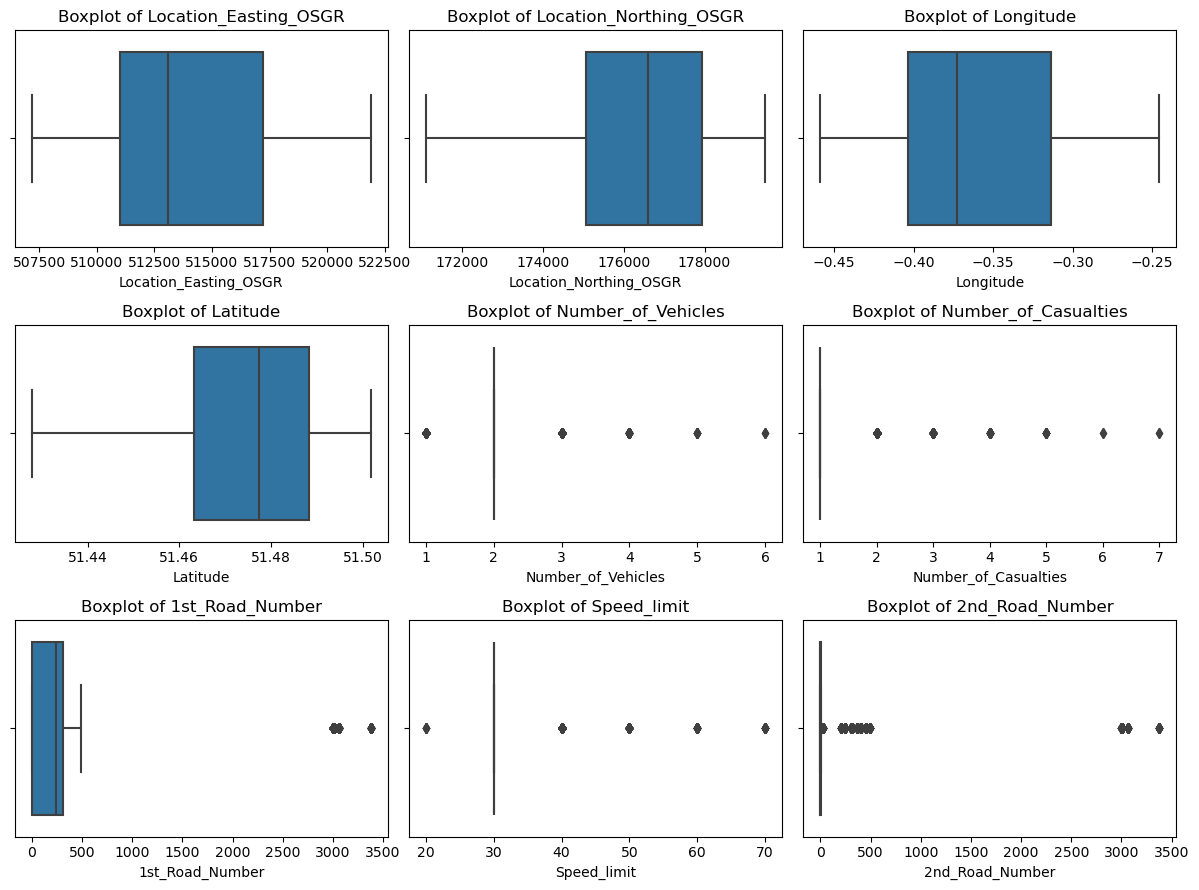

In [20]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Determine the number of rows/columns for the subplot grid
num_cols = 3 
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # this ensures enough subplots
plt.figure(figsize=(num_cols * 4, num_rows * 3))  # adjust the size as needed

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [62]:
# Identify constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Drop constant columns from the DataFrame
df = df.drop(columns=constant_columns)


/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

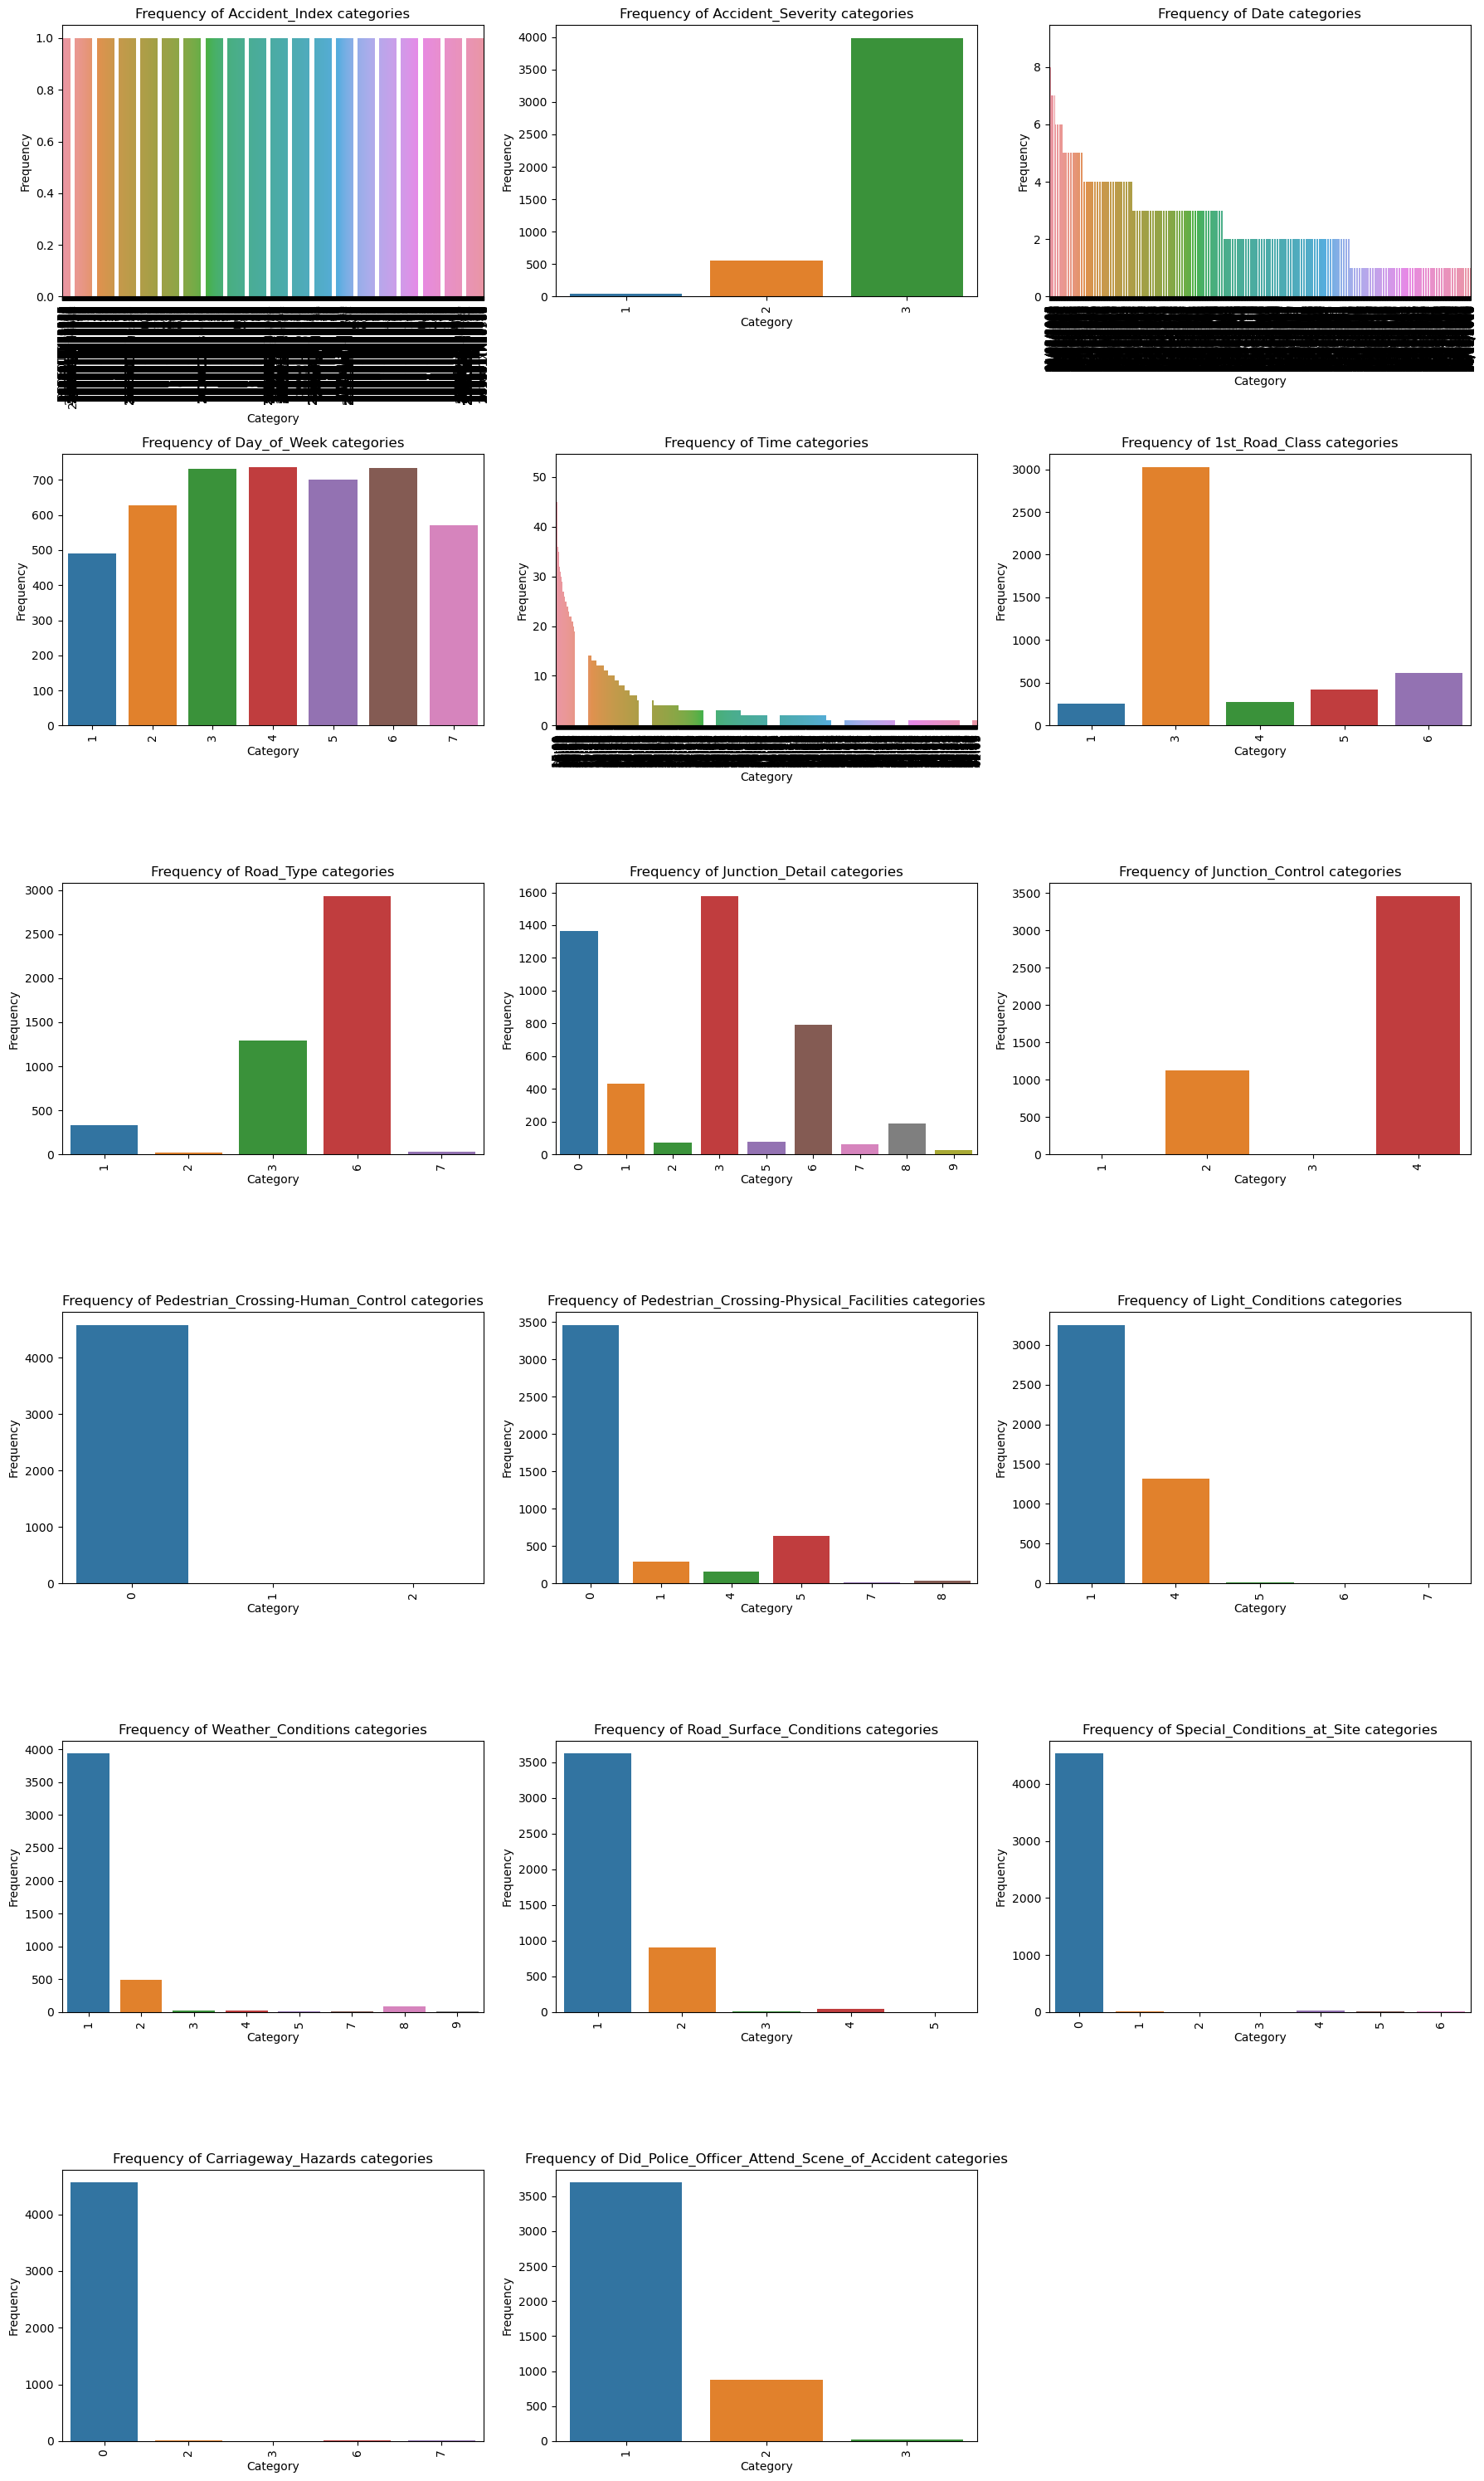

In [30]:
 categorical_cols = df.select_dtypes(include=['object','category']).columns

# Determine the number of rows/columns for the subplot grid
num_cols = 3 
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  # this ensures enough subplots

# Set up the matplotlib figure
plt.figure(figsize=(num_cols * 6, num_rows * 5)) 

# Create a bar plot for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    category_counts = df[col].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f"Frequency of {col} categories")
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

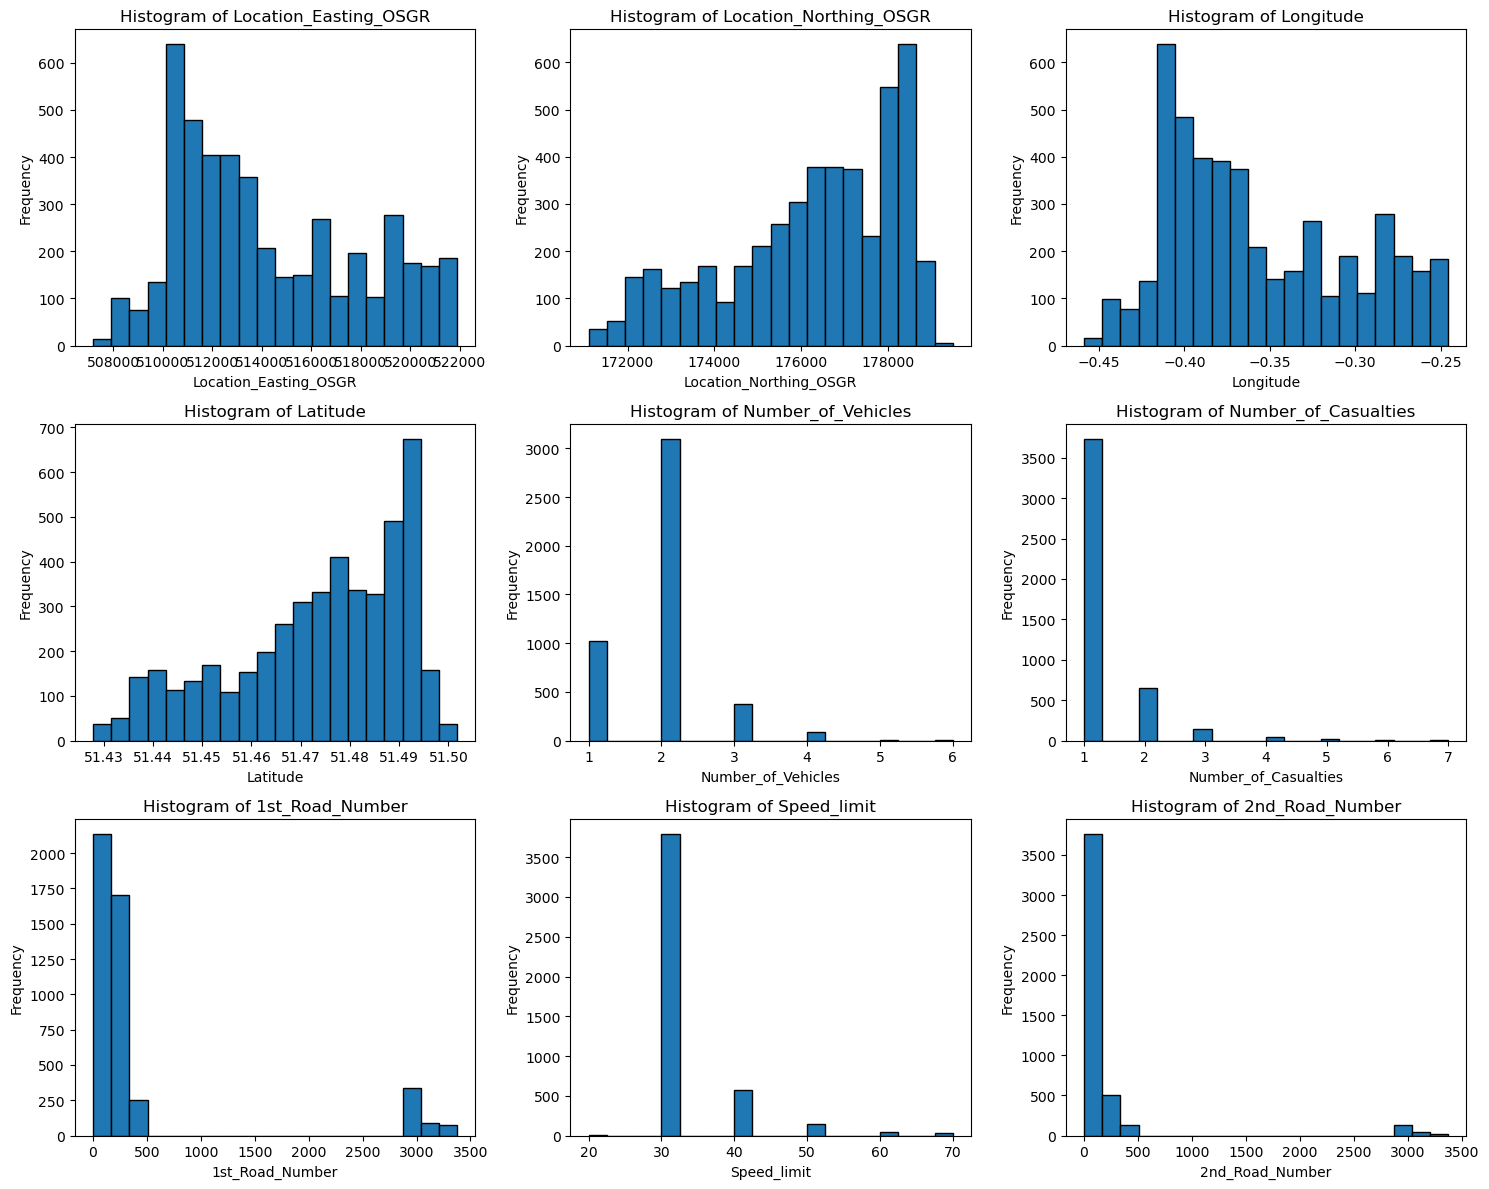

In [21]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Determine the number of rows/columns for the subplot grid
num_cols = 3  
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # this ensures enough subplots

# Set up the matplotlib figure
plt.figure(figsize=(num_cols * 5, num_rows * 4))  # adjust the size as needed

# Create a histogram for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df[col].dropna(), bins=20, edgecolor='black') 
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [100]:
df = df.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR'])

KeyError: "['Location_Easting_OSGR', 'Location_Northing_OSGR'] not found in axis"

In [99]:
# Calculate Z-scores of df
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# Get boolean mask where outliers are present in any numerical column
outliers = (z_scores > threshold).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()

print(f"Number of rows with outliers: {num_outliers}")

Number of rows with outliers: 0


In [70]:

# Calculate Z-scores of df for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))

# Get absolute Z-scores to identify outliers on both tails
abs_z_scores = np.abs(z_scores)

# Define a threshold for identifying outliers
threshold = 3

# Get boolean mask where no outliers are present in any numerical column
non_outliers = (abs_z_scores < threshold).all(axis=1)

# Drop rows with outliers from the original DataFrame
original_shape = df.shape
df = df[non_outliers]

# Display how many rows were dropped
rows_dropped = original_shape[0] - df.shape[0]
print(f"Dropped {rows_dropped} rows containing outliers.")

Dropped 3 rows containing outliers.


In [101]:
df.describe()

,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,1st_Road_Number,Speed_limit,2nd_Road_Number
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,-0.355803,51.472794,1.835462,1.139590,163.532225,31.342441,39.503416
std,0.055834,0.017936,0.533725,0.346613,162.731503,3.409651,101.492914
min,-0.458762,51.427842,1.000000,1.000000,0.000000,30.000000,0.000000
25%,-0.404340,51.460991,2.000000,1.000000,0.000000,30.000000,0.000000
50%,-0.374114,51.476931,2.000000,1.000000,205.000000,30.000000,0.000000
75%,-0.305341,51.487655,2.000000,1.000000,315.000000,30.000000,0.000000
max,-0.245604,51.501776,3.000000,2.000000,491.000000,40.000000,316.000000


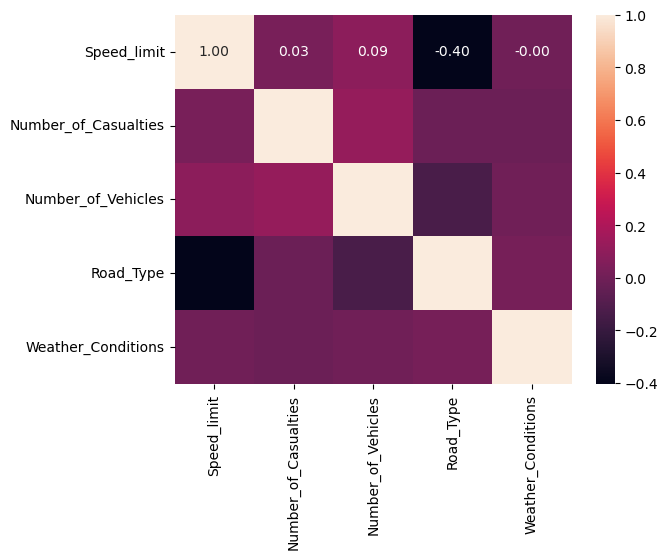

In [44]:
# Choose variables to check for correlation
selected_columns = df[[ 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Type', 'Weather_Conditions']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

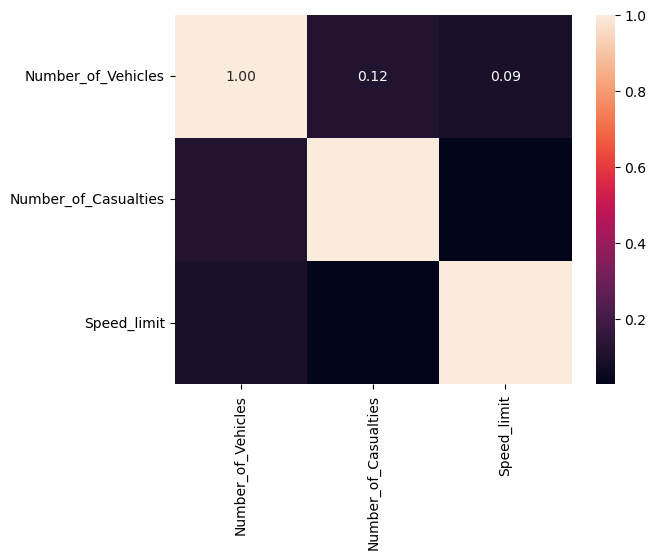

In [45]:
# Choose variables to check for correlation
selected_columns = df[['Number_of_Vehicles', 'Number_of_Casualties','Speed_limit']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [31]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [32]:
import folium


# Create a map centered around the average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add accident points to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        popup=f"Accident Severity: {row['Accident_Severity']}",
        color='blue' if row['Accident_Severity'] == 3 else 'orange' if row['Accident_Severity'] == 2 else 'red',
        fill=True
    ).add_to(m)

# Save the map to an HTML file
m.save('hounslow_accidents_map.html')


In [33]:
import folium
from folium.plugins import MarkerCluster


# Create a map centered around the average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Accident Severity: {row['Accident_Severity']}",
        icon=None
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('hounslow_accidents_clustermap.html')

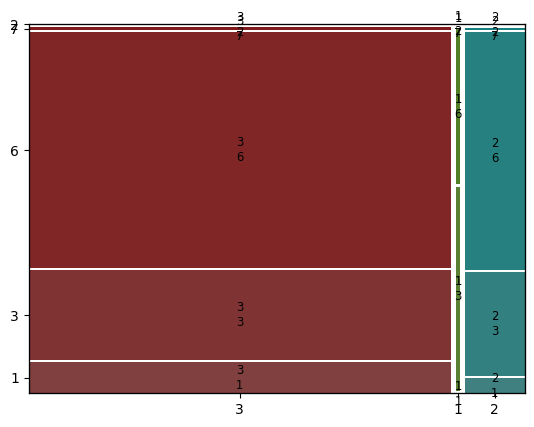

In [104]:
from statsmodels.graphics.mosaicplot import mosaic

# 'df' is your DataFrame, and 'category1' and 'category2' are your categorical variables
mosaic(df, ['Accident_Severity', 'Road_Type'], gap=0.01)
plt.show()

Accuracy: 0.8798219584569733
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        75
           3       0.88      1.00      0.94       593

    accuracy                           0.88       674
   macro avg       0.29      0.33      0.31       674
weighted avg       0.77      0.88      0.82       674



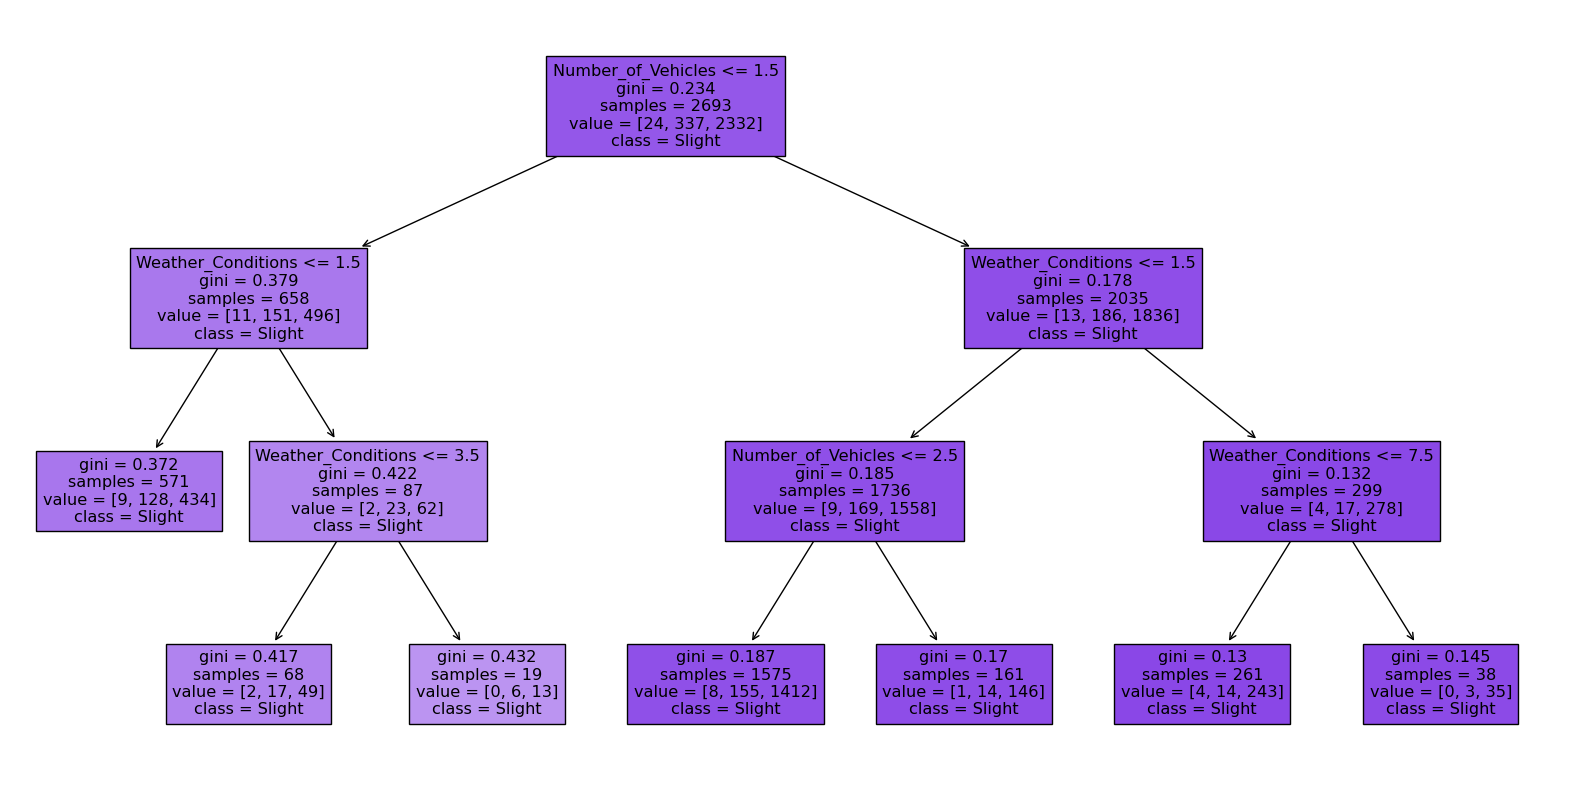

In [98]:

# Selecting features and target variable
# Replace the column names with the names of the processed columns
X = df[[ 'Weather_Conditions', 'Number_of_Vehicles' ]]
y = df['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)  # Example parameters
clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred,zero_division=0))

class_names_list = ['Fatal', 'Serious', 'Slight'] 

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=class_names_list)
plt.show()

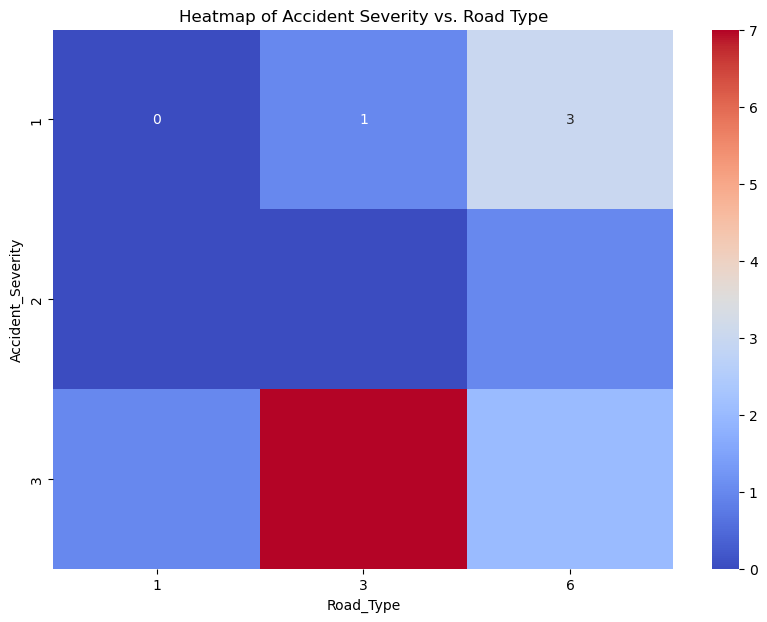

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation
data = {
    'Accident_Severity': [3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 2, 3, 3, 1, 3], # and so on...
    'Road_Type': [1, 3, 6, 6, 6, 3, 3, 3, 3, 3, 6, 3, 6, 6, 3], # and so on...
    'Weather_Conditions': [1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1] # and so on...
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Accident_Severity'], df['Road_Type'])

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Accident Severity vs. Road Type')
plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming X features and y labels are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling the minority class using SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training a classifier with class weights
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train_smote, y_train_smote)

# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.01      0.50      0.03         6
           2       0.13      0.51      0.21        75
           3       0.94      0.26      0.41       593

    accuracy                           0.29       674
   macro avg       0.36      0.42      0.21       674
weighted avg       0.85      0.29      0.38       674



/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/pandas/core/arrays/base.py:530: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


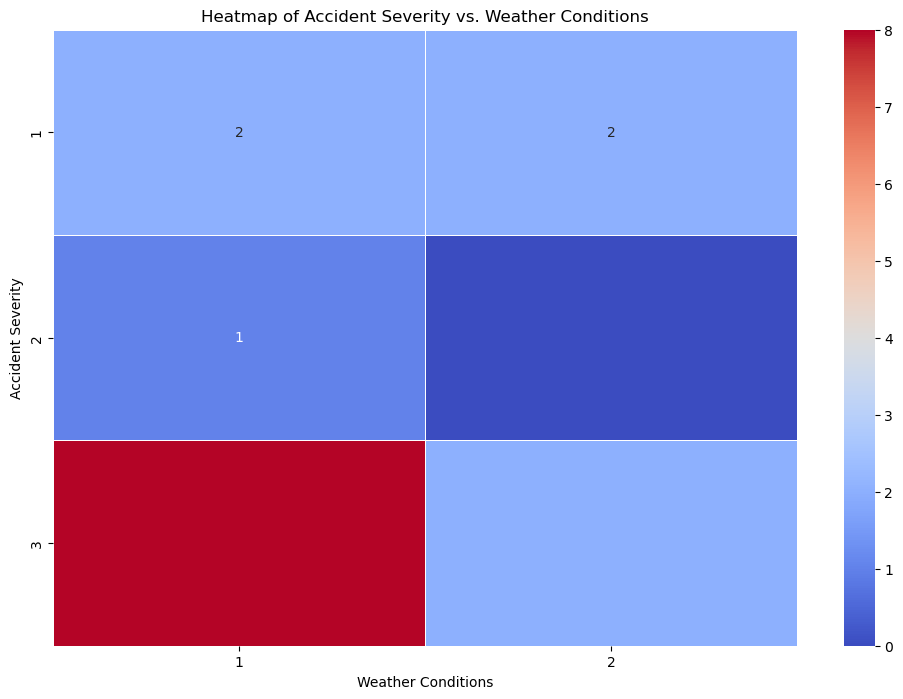

In [112]:
# Create a contingency table
contingency_table = pd.crosstab(df['Accident_Severity'], df['Weather_Conditions'])

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the size to fit your needs
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Accident Severity vs. Weather Conditions')
plt.ylabel('Accident Severity')
plt.xlabel('Weather Conditions')

# Display the heatmap
plt.show()

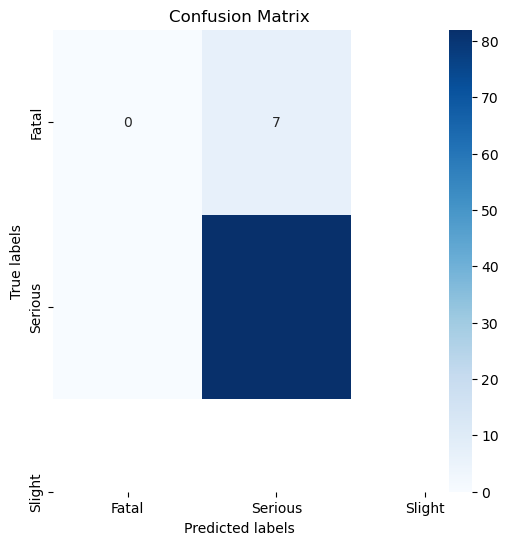

In [71]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=class_names_list, yticklabels=class_names_list)

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names_list)
ax.yaxis.set_ticklabels(class_names_list)

plt.show()

     Accident_Index  Cluster_Labels
0     200501ID60078               1
1     200501SX20837               0
4     200501TB00288               2
5     200501TE00004               2
6     200501TE00005               1
...             ...             ...
4585  201001TX20888               2
4588  201001XD80174               2
4589  201001XD80325               1
4590  201001XD80356               2
4592  201001XH30096               0

[3367 rows x 2 columns]


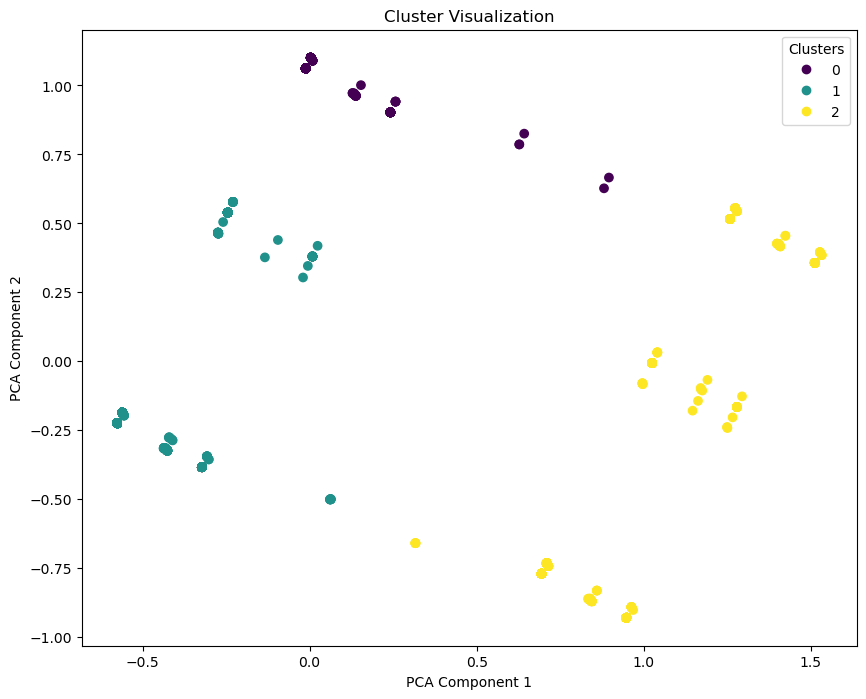

In [52]:
categorical_features = ['Accident_Severity', 'Road_Type', 'Weather_Conditions', 'Light_Conditions']
df_categorical = df[categorical_features]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to categorical data
df_encoded = encoder.fit_transform(df_categorical)

# Now df_encoded contains the one-hot encoded categorical features
# Let's convert it back to a DataFrame for better handling
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Perform k-means clustering
# Let's say we want to create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)

# Fit the model
kmeans.fit(df_encoded)

# The cluster assignment for each data point is now available
cluster_labels = kmeans.labels_

# Attach cluster labels back to the original DataFrame
df['Cluster_Labels'] = cluster_labels

# Output the DataFrame with cluster labels
print(df[['Accident_Index', 'Cluster_Labels']])
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)

# Scatter plot the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=set(cluster_labels), title="Clusters")

# Show the plot
plt.show()

In [10]:
conda update scikit-learn

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [37]:
df_association = df[['Road_Type', 'Weather_Conditions', 'Accident_Severity']]

# Convert the columns to a format suitable for association analysis
# convert the categorical variables to a one-hot encoded format
df_one_hot = pd.get_dummies(df_association)

# Apply the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_one_hot, min_support=0.01, use_colnames=True)

# Generate the rules with their corresponding support, confidence, and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules
# Filter the rules based on the lift metric to find the most significant associations
# For instance, we might be interested in rules where lift is greater than 1
#significant_rules = rules[rules['lift'] > 1.0]

# Display the rules sorted by descending order of confidence
#print(significant_rules.sort_values(by='confidence', ascending=False))



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road_Type_1),(Weather_Conditions_1),0.080487,0.852094,0.069201,0.859779,1.009019,0.000619,1.054804,0.009720
1,(Road_Type_1),(Accident_Severity_3),0.080487,0.868726,0.075438,0.937269,1.078901,0.005517,2.092664,0.079532
2,(Road_Type_3),(Weather_Conditions_1),0.256311,0.852094,0.219780,0.857474,1.006314,0.001379,1.037748,0.008437
3,(Weather_Conditions_1),(Road_Type_3),0.852094,0.256311,0.219780,0.257930,1.006314,0.001379,1.002181,0.042421
4,(Weather_Conditions_2),(Road_Type_3),0.112860,0.256311,0.028215,0.250000,0.975377,-0.000712,0.991585,-0.027669
...,...,...,...,...,...,...,...,...,...,...
58,(Road_Type_6),"(Accident_Severity_3, Weather_Conditions_2)",0.653104,0.100683,0.065637,0.100500,0.998184,-0.000119,0.999797,-0.005218
59,(Weather_Conditions_2),"(Road_Type_6, Accident_Severity_3)",0.112860,0.568459,0.065637,0.581579,1.023081,0.001481,1.031357,0.025430
60,"(Road_Type_6, Weather_Conditions_8)",(Accident_Severity_3),0.012474,0.868726,0.011286,0.904762,1.041481,0.000450,1.378378,0.040332
61,"(Accident_Severity_3, Weather_Conditions_8)",(Road_Type_6),0.015147,0.653104,0.011286,0.745098,1.140857,0.001393,1.360901,0.125365


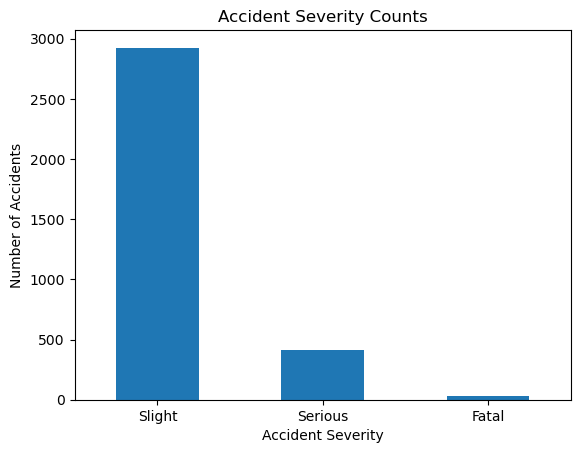

In [60]:
severity_counts = df['Accident_Severity'].value_counts()

# Create a bar chart
severity_counts.plot(kind='bar')
plt.title('Accident Severity Counts')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2], labels=['Slight', 'Serious', 'Fatal'], rotation=0)  # Assuming 1:Fatal, 2:Serious, 3:Slight
plt.show()

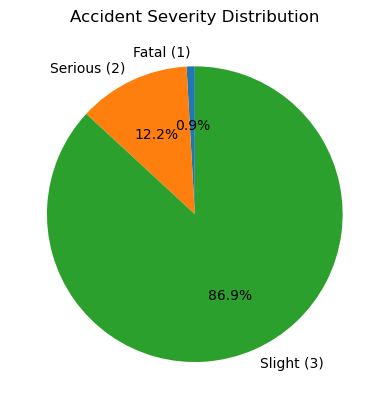

In [59]:
# Count the occurrence of each accident severity
severity_counts = df['Accident_Severity'].value_counts().sort_index()

# Define labels for the pie chart according to the accident severity values
labels = ['Fatal (1)', 'Serious (2)', 'Slight (3)']

# Make sure the labels correspond to the sorted index values
labels = [labels[i-1] for i in severity_counts.index]

# Create a pie chart
severity_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Accident Severity Distribution')
plt.ylabel('')  # Hide the y-label as it's not necessary for pie charts
plt.show()

In [61]:
# Filter out rows where Accident Severity is 3 (Slight)
df_filtered = df[df['Accident_Severity'] != 3]


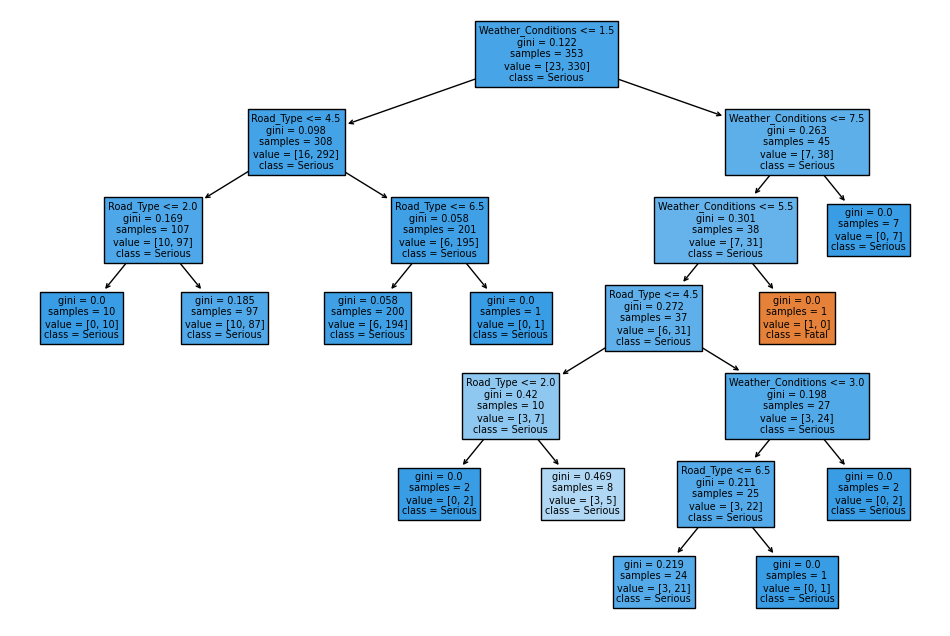

In [64]:
X = df_filtered[['Weather_Conditions', 'Road_Type']]
y = df_filtered['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['Weather_Conditions', 'Road_Type'], class_names=['Fatal', 'Serious'])
plt.show()

In [73]:
from IPython.display import FileLink
df.to_csv('CW.csv', index=False)
# Create a link to download the CSV file
FileLink('CW.csv')

/Users/sabbirahamedsaown/Desktop/DMA/CW.csv

In [67]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Fatal', 'Serious'])

# Print the classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 0  7]
 [ 0 82]]

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00         7
     Serious       0.92      1.00      0.96        82

    accuracy                           0.92        89
   macro avg       0.46      0.50      0.48        89
weighted avg       0.85      0.92      0.88        89



/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

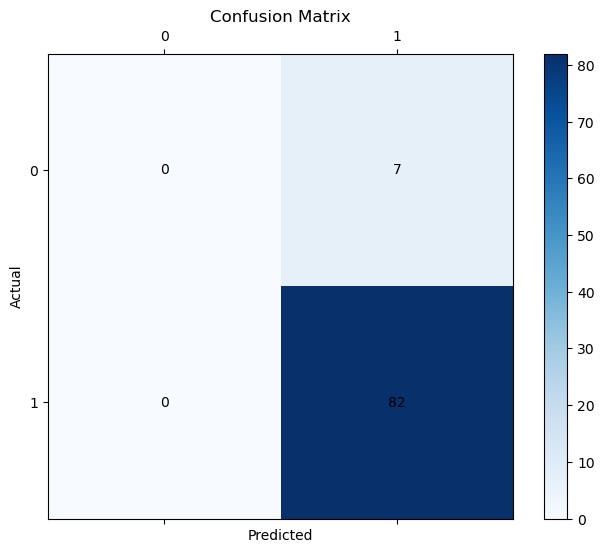

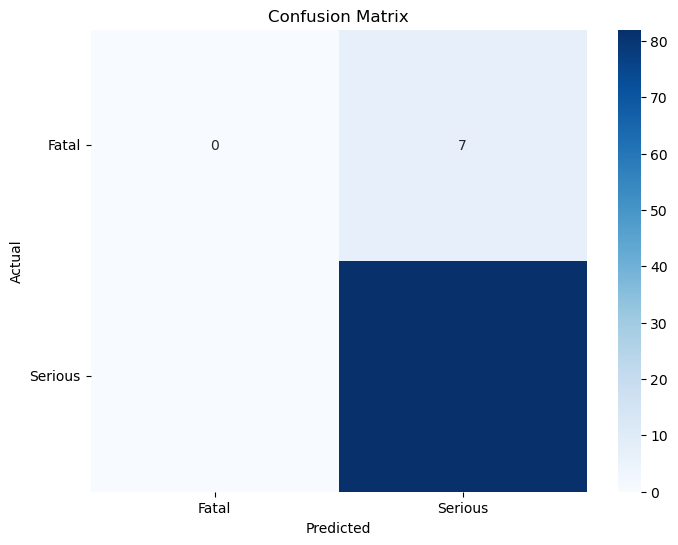

In [69]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Using matplotlib to create a basic visualization
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add annotation to each cell
for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{val}', horizontalalignment='center', verticalalignment='center')

plt.show()

# Using seaborn to create an advanced heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues') # 'g' means generic number format
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# In seaborn, the ticks are centered by default so we'll add them manually
tick_marks = np.arange(len(['Fatal', 'Serious'])) + 0.5
plt.xticks(tick_marks, ['Fatal', 'Serious'], rotation=0)
plt.yticks(tick_marks, ['Fatal', 'Serious'], rotation=0)

plt.show()

In [33]:

from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['Accident_Severity'], df['Speed_limit'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 21.109730658384144
P-value: 2.6066350477025508e-05


/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'int' object has no attribute 'startswith'

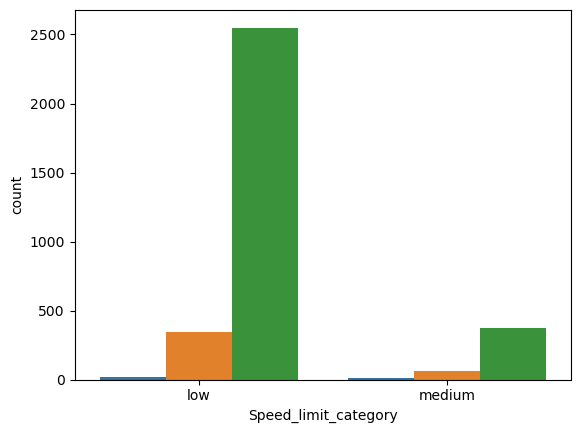

In [34]:

# Create a bar plot to show the relationship
sns.countplot(x='Speed_limit_category', hue='Accident_Severity', data=df)

# Enhance the plot
plt.title('Accident Severity by Speed Limit Category')
plt.xlabel('Speed Limit Category')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')

# Show the plot
plt.show()

In [39]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(index=df['Speed_limit'], columns=df['Speed_limit_category'], margins=True, normalize='index')

# Show the cross-tabulation table as percentages
cross_tab_percentage = cross_tab.apply(lambda r: r*100/r.sum(), axis=1)
print(cross_tab_percentage)

Speed_limit_category         low      medium
Speed_limit                                 
30                    100.000000    0.000000
40                      0.000000  100.000000
All                    86.575587   13.424413


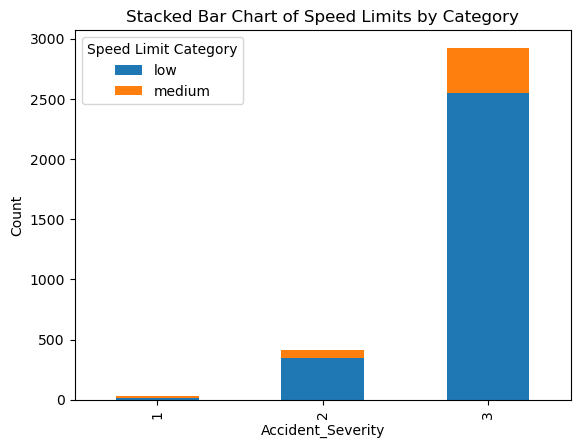

In [41]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['Accident_Severity'], df['Speed_limit_category'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Speed Limits by Category')
plt.xlabel('Accident_Severity')
plt.ylabel('Count')
plt.legend(title='Speed Limit Category')
plt.show()


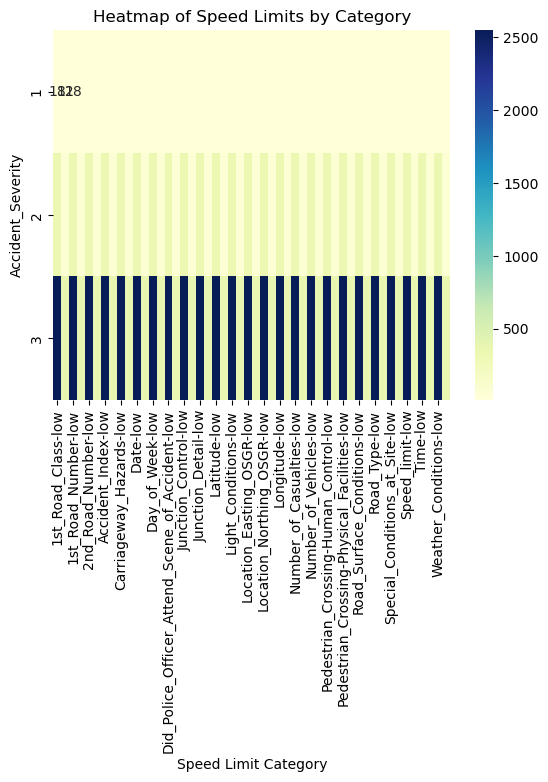

In [42]:
# Create a pivot table for the heatmap
pivot_table = pd.pivot_table(df, index='Accident_Severity', columns='Speed_limit_category', aggfunc=len, fill_value=0)

# Plot a heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Speed Limits by Category')
plt.xlabel('Speed Limit Category')
plt.ylabel('Accident_Severity')
plt.show()

/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sabbirahame

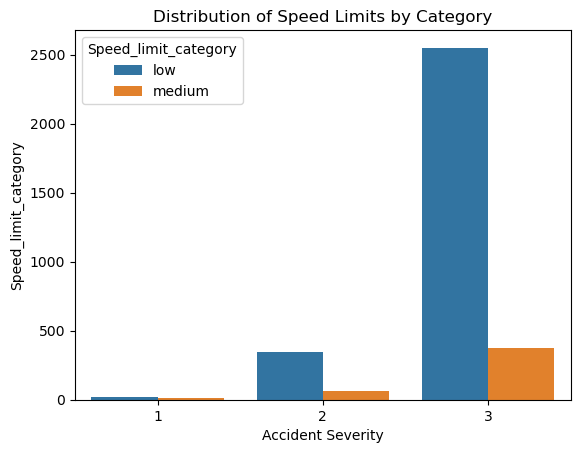

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Speed_limit' is the original categorical speed limit, and 'Speed_limit_category' is the derived category
sns.countplot(x='Accident_Severity', hue='Speed_limit_category', data=df)
plt.title('Distribution of Speed Limits by Category')
plt.xlabel('Accident Severity')
plt.ylabel('Speed_limit_category')
plt.show()

In [95]:
columns_to_encode = ['Road_Type', 'Accident_Severity', 'Number_of_Vehicles', 'Weather_Conditions', 'Light_Conditions']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Display the first few rows of the DataFrame to verify
print(df_encoded.head())

  Accident_Index  Longitude   Latitude  Number_of_Casualties        Date  \
0  200501ID60078  -0.454758  51.455367                     1  30/09/2005   
1  200501SX20837  -0.282325  51.493614                     1  13/10/2005   
4  200501TB00288  -0.297600  51.489610                     1  19/08/2005   
5  200501TE00004  -0.330845  51.458884                     1  03/01/2005   
6  200501TE00005  -0.304148  51.483950                     2  11/01/2005   

  Day_of_Week   Time 1st_Road_Class  1st_Road_Number  Speed_limit  ...  \
0           6  14:36              5                0           30  ...   
1           5  08:25              3              406           40  ...   
4           6  02:15              6                0           30  ...   
5           2  22:35              6                0           30  ...   
6           3  13:16              3              315           30  ...   

  Weather_Conditions_4 Weather_Conditions_5  Weather_Conditions_7  \
0                False       

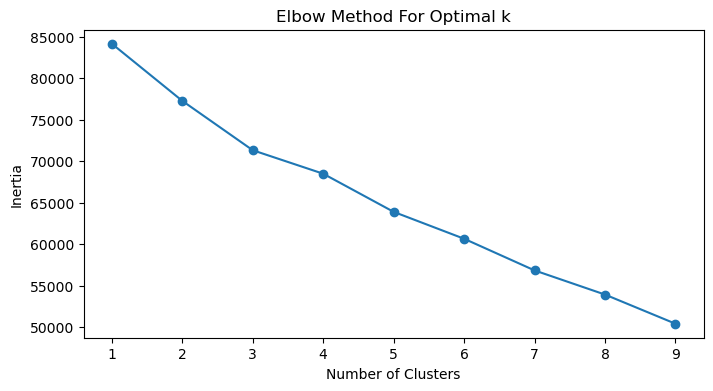

Cluster 0 summary:
         Longitude     Latitude  Number_of_Casualties  1st_Road_Number  \
count  2083.000000  2083.000000           2083.000000      2083.000000   
mean     -0.355006    51.472985              1.128661       162.477196   
std       0.056272     0.018081              0.334904       162.984906   
min      -0.458762    51.427842              1.000000         0.000000   
25%      -0.403977    51.460920              1.000000         0.000000   
50%      -0.371641    51.477276              1.000000       205.000000   
75%      -0.304090    51.488056              1.000000       315.000000   
max      -0.245604    51.501776              2.000000       491.000000   

       Speed_limit  2nd_Road_Number  Cluster  
count  2083.000000      2083.000000   2083.0  
mean     31.228997        39.209313      0.0  
std       3.284008       101.423563      0.0  
min      30.000000         0.000000      0.0  
25%      30.000000         0.000000      0.0  
50%      30.000000         0.000

/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only the one-hot encoded columns and the 'Number_of_Casualties' and 'Number_of_Vehicles' columns
relevant_columns = [col for col in df_encoded.columns if 'Road_Type' in col 
                    or 'Accident_Severity' in col 
                    or 'Number_of_Vehicles' in col 
                    or 'Weather_Conditions' in col 
                    or 'Light_Conditions' in col]
relevant_columns.append('Number_of_Casualties')


X = df_encoded[relevant_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the number of clusters (k) where the decrease in inertia begins to diminish
# For example, if the elbow is at k=3:
k_optimal = 3

# Perform K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=1)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe for analysis
df_encoded['Cluster'] = clusters

# Analyze the clusters
for i in range(k_optimal):
    cluster_data = df_encoded[df_encoded['Cluster'] == i]
    print(f"Cluster {i} summary:")
    print(cluster_data.describe())

In [87]:
import folium

# Assuming 'Latitude' and 'Longitude' are the names of the columns with the geographical data
lat_col = 'Latitude'
lon_col = 'Longitude'

# Create a map
map_center = [df_encoded[lat_col].mean(), df_encoded[lon_col].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=12)

# Set color scheme for the clusters
colors = ['blue', 'green', 'red', 'purple', 'orange', 'darkred',
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
          'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
          'gray', 'black', 'lightgray']

# Add points to the map
for _, row in df_encoded.iterrows():
    cluster_color = colors[int(row['Cluster']) % len(colors)]
    folium.CircleMarker(
        location=[row[lat_col], row[lon_col]],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.6
    ).add_to(cluster_map)

# Save the map to an HTML file
cluster_map.save('cluster_map.html')

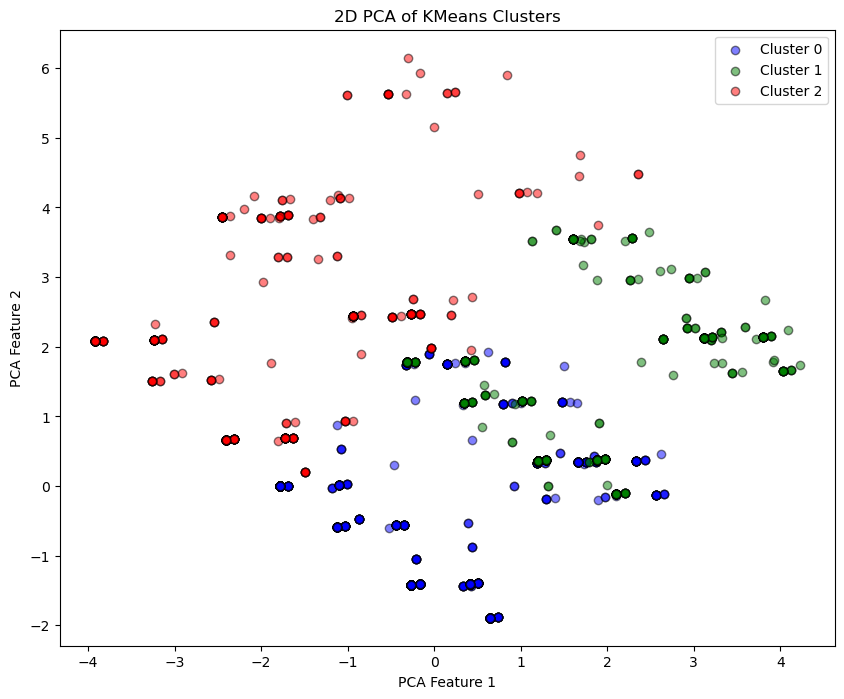

In [80]:
from sklearn.decomposition import PCA

# Reduce the data to two dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the two PCA dimensions, color-coded by cluster
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(k_optimal):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                color=colors[i], label=f'Cluster {i}', alpha=0.5, edgecolor='k')

plt.title('2D PCA of KMeans Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [92]:
import folium

# Make sure these columns exist in your DataFrame
lat_col = 'Latitude'
lon_col = 'Longitude'

# Create a base map
map_center = [df_encoded[lat_col].mean(), df_encoded[lon_col].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=12)

# Colors for each cluster
colors = ['blue', 'green', 'red']

# Add points to the map for each cluster
for cluster_num in range(3):  # We only want clusters 0, 1, and 2
    cluster_data = df_encoded[df_encoded['Cluster'] == cluster_num]
    cluster_color = colors[cluster_num]
    
    for _, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row[lat_col], row[lon_col]],
            radius=5,
            color=cluster_color,
            fill=True,
            fill_color=cluster_color,
            fill_opacity=0.6
        ).add_to(cluster_map)

# Save the map to an HTML file
cluster_map.save('cluster_map2.html')

In [93]:
import folium
from folium.plugins import HeatMap

# Make sure these columns exist in your DataFrame
lat_col = 'Latitude'
lon_col = 'Longitude'

# Create a base map
map_center = [df_encoded[lat_col].mean(), df_encoded[lon_col].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=12)

# Colors for each cluster - used for the gradient in HeatMap
colors = {
    0: 'blue',
    1: 'green',
    2: 'red'
}

# Define a gradient for each cluster based on the cluster color
gradient = {
    0: {0.2: colors[0], 1: colors[0]},
    1: {0.2: colors[1], 1: colors[1]},
    2: {0.2: colors[2], 1: colors[2]}
}

# Add a heatmap to the map for each cluster
for cluster_num in range(3):  # We only want clusters 0, 1, and 2
    cluster_data = df_encoded[df_encoded['Cluster'] == cluster_num]
    heat_data = [[row[lat_col], row[lon_col]] for index, row in cluster_data.iterrows()]
    
    # Create and add a HeatMap layer
    HeatMap(heat_data, gradient=gradient[cluster_num]).add_to(cluster_map)

# Save the map to an HTML file
cluster_map.save('cluster_heatmap.html')

/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sabbirahamedsaown/opt/anaconda3/envs/newenv/lib/python3.9/si

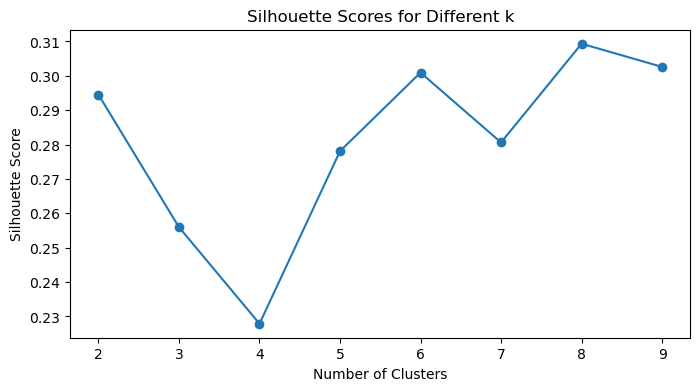

In [97]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Silhouette score is only defined for 2 or more clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()